In [5]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
from tweedejaars_project.utility.misc import flatten_ptu
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *

df = load_df()
temp = df[110000:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.96      0.97     39686
        True       0.43      0.65      0.52      2074

    accuracy                           0.94     41760
   macro avg       0.71      0.81      0.74     41760
weighted avg       0.95      0.94      0.95     41760

Confusion Matrix:


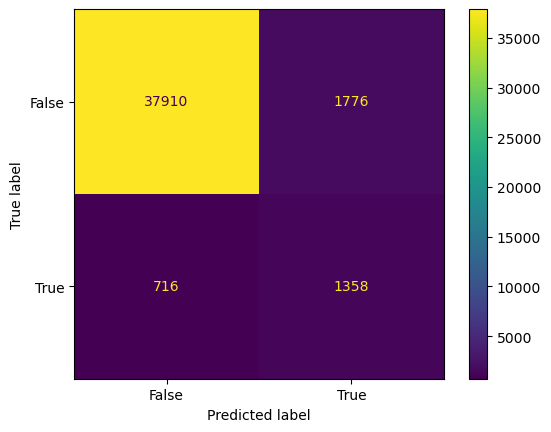

In [2]:
features = [
    'import_capacity',
    'min_price_published',
    'mid_price_published',
    'max_price_published',
    'min_ptu_price_known',
    'max_ptu_price_known',
    'settlement_price_bestguess',
    'time_since_last_two_sided',
    'two_sided_daily_count',
    'PTU',
    'naive_strategy_action',
    'forecast_wind',
    'forecast_solar',
    'forecast_demand',
    'target_two_sided_ptu_realtime'
]
splits = get_splits(df, features, return_dict_pair=False)
m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss='poisson', l2_regularization=4)
m.fit(*splits['train'])
p = m.predict(splits['valid'][0])
# print(pd.Series(p).describe())
# p = p > 0.5

p = realtime_adjustment(splits['valid'][0], p)

show_basic_metrics(splits['valid'][1], p, splits['valid'][2], False)

temp = df[110000:] # 110240 target is false maar is wel twoside
# vraag voor final delivery hoe en hoe realtime
# vraag correctheid van metrics
# vraag hun performance en model type

In [3]:
df['fake_ptu'] = (df['ptu_id'] + 4) % 96 + 1
df['check'] = df['PTU'] == df['fake_ptu'] 
print(df['check'].all())
temp = df[133900:] # 133979 zomertijd jumpt van 8 naar 13

False


In [4]:
# Calculate the time difference between consecutive rows
df['time_diff'] = df['datetime'].diff()

# Check if all time differences are equal to one minute
is_every_minute = (df['time_diff'] == pd.Timedelta(minutes=1))[1:].all()
is_every_minute

True